## Getting data

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [281]:
def show_result(dataset, cl_pred):
  f0 = [f[0] for f in dataset]
  f1 = [f[1] for f in dataset]
  if(dataset.shape[1] == 3):
    f2 = [f[2] for f in dataset]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_title("Données après clustering")
    ax.scatter3D(f0, f1, f2, c=cl_pred);
  else:
    plt.scatter(f0, f1, c=cl_pred,s=8)
    plt.title("Données après clustering")
    plt.show()

## A

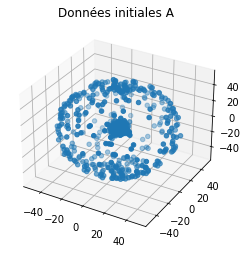

In [282]:
a_ds = pd.read_csv("dataset/dataset/a.data", sep="\t").to_numpy()
f0_a = [f[0] for f in a_ds]
f1_a = [f[1] for f in a_ds]
f3_a = [f[2] for f in a_ds]

%matplotlib inline


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Données initiales A")
ax.scatter3D(f0_a, f1_a, f3_a);

## H

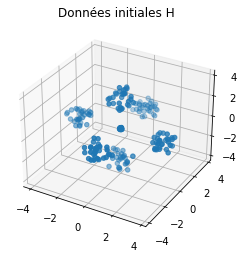

In [283]:
h_ds = pd.read_csv("dataset/dataset/h.data", sep="\t").to_numpy()
f0_h = [f[0] for f in h_ds]
f1_h = [f[1] for f in h_ds]
f3_h = [f[2] for f in h_ds]

%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Données initiales H")
ax.scatter3D(f0_h, f1_h, f3_h);

## T

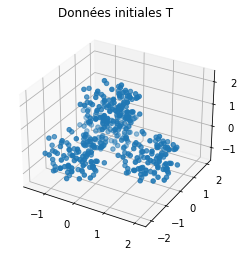

In [284]:
t_ds = pd.read_csv("dataset/dataset/t.data", sep="\t").to_numpy()
f0_t = [f[0] for f in t_ds]
f1_t = [f[1] for f in t_ds]
f3_t = [f[2] for f in t_ds]

%matplotlib inline


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Données initiales T")
ax.scatter3D(f0_t, f1_t, f3_t);

## TR

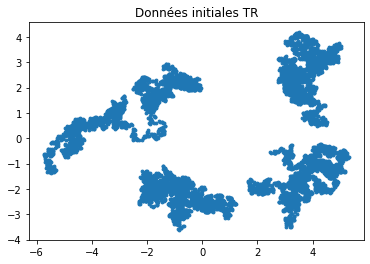

In [285]:
tr_ds = pd.read_csv("dataset/dataset/tr.data", sep="\s+", header=None).to_numpy()
f0_tr = [f[0] for f in tr_ds]
f1_tr = [f[1] for f in tr_ds]


plt.scatter(f0_tr, f1_tr, s=8)
plt.title("Données initiales TR")
plt.show()


## ZGN

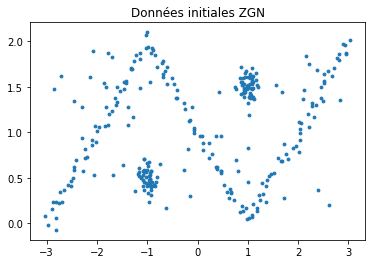

In [286]:
zgn_ds = pd.read_csv("dataset/dataset/zgn.data", sep="\s+", header=None).to_numpy()
f0_zgn = [f[0] for f in zgn_ds]
f1_zgn = [f[1] for f in zgn_ds]

plt.scatter(f0_zgn, f1_zgn, s=8)
plt.title("Données initiales ZGN")
plt.show()

## ZGO

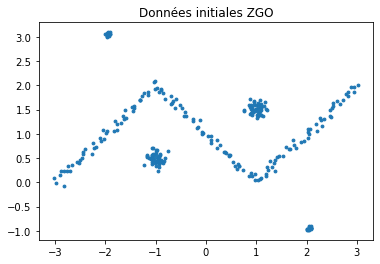

In [287]:
zgo_ds = pd.read_csv("dataset/dataset/zgo.data", sep="\s+", header=None).to_numpy()
f0_zgo = [f[0] for f in zgo_ds]
f1_zgo = [f[1] for f in zgo_ds]

plt.scatter(f0_zgo, f1_zgo, s=8)
plt.title("Données initiales ZGO")
plt.show()

In [288]:
datasets = [a_ds, t_ds, h_ds, tr_ds, zgn_ds, zgo_ds]

# Application of KMEANS

In [289]:
from timeit import default_timer
from sklearn import metrics
from sklearn.cluster import KMeans

In [307]:
def KMeans_application(from_n_clusters, to_n_clusters, dataset):
  results = pd.DataFrame()
  for nb_cluster in range(from_n_clusters, to_n_clusters):
    start = default_timer() 
    cl_pred = KMeans(n_clusters=nb_cluster, init='k-means++').fit_predict(dataset)
    stop = default_timer()
    results.loc[nb_cluster,'Cluster Number'] = nb_cluster
    results.loc[nb_cluster,'Time'] = stop-start
    results.loc[nb_cluster,'Silhouette coefficient'] = metrics.silhouette_score(dataset, cl_pred, metric='euclidean')
    results.loc[nb_cluster, 'Davies Bouldin score'] = metrics.silhouette_score(dataset, cl_pred)
  best_silh = max(results['Silhouette coefficient'])
  silhs = results['Silhouette coefficient'].to_numpy()
  best_nb_clusters = (np.where(silhs == best_silh)[0]+from_n_clusters)[0]
  cl_pred = KMeans(n_clusters=best_nb_clusters, init='k-means++').fit_predict(dataset)
  show_result(dataset, cl_pred)
  return best_silh, metrics.davies_bouldin_score(dataset, cl_pred)

0 (0.6233696510482774, 0.8135888641367995)
1 (0.5051896443563737, 0.6650690365706583)
2 (0.7006485323074687, 0.3550474416811)


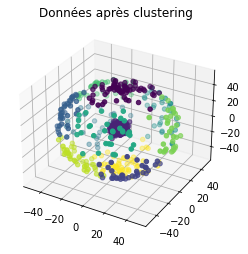

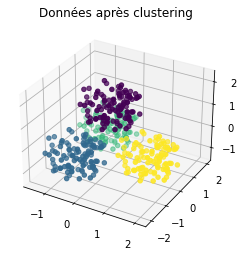

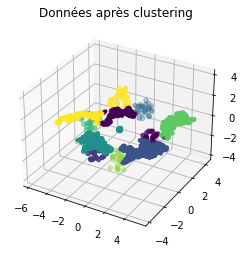

3 (0.6537842224110809, 0.5005566662823877)


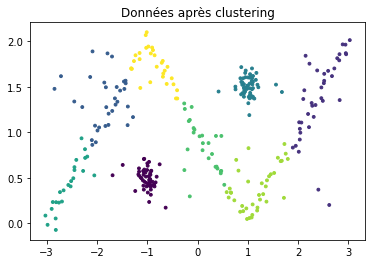

4 (0.5921634345448278, 0.5945185220052748)


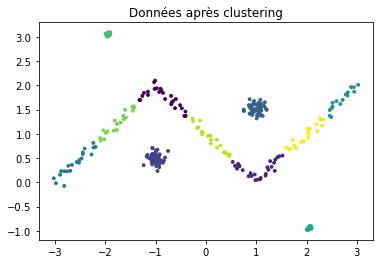

5 (0.6876525786780527, 0.4566164458022985)


In [308]:
for idx, ds in enumerate(datasets):
    print(idx, KMeans_application(2, 20, ds))

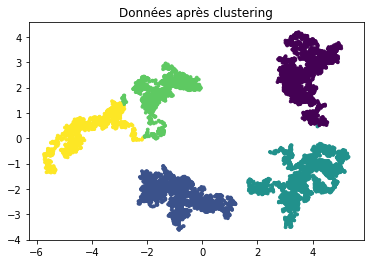

,Cluster Number,Time,Silhouette coefficient,Davies Bouldin score
2,2.0,0.040210,0.536770,0.536770
3,3.0,0.053719,0.554954,0.554954
4,4.0,0.044290,0.634999,0.634999
5,5.0,0.055902,0.653760,0.653760
6,6.0,0.053636,0.586395,0.586395
7,7.0,0.084520,0.543247,0.543247
8,8.0,0.100813,0.501007,0.501007
9,9.0,0.109995,0.491772,0.491772
10,10.0,0.114787,0.491807,0.491807
11,11.0,0.122294,0.490187,0.490187


In [292]:
KMeans_application(2, 20, tr_ds)

# Application of agglomerative clustering

In [293]:
from sklearn.cluster import AgglomerativeClustering

In [294]:
linkages = ['single', 'complete', 'ward', 'average']

In [295]:
def agglomerative_application(from_n_clusters,max_number_clusters, dataset):
  results = pd.DataFrame()
  for linkage in linkages:
      for nb_cluster in range(from_n_clusters, max_number_clusters):
        start = default_timer()
        cl_predict = AgglomerativeClustering(n_clusters = nb_cluster, linkage=linkage).fit(dataset)
        stop = default_timer()
        cl_predict_2 = AgglomerativeClustering(n_clusters = nb_cluster, linkage=linkage).fit_predict(dataset)
        results.loc[nb_cluster,'Cluster Number'] = nb_cluster
        results.loc[nb_cluster,'Time'] = stop-start
        results.loc[nb_cluster,'Silhouette coefficient'] = metrics.silhouette_score(dataset, cl_predict_2, metric='euclidean')
        results.loc[nb_cluster, 'Linkage'] = linkage
  best_silh = max(results['Silhouette coefficient'])
  silhs = results['Silhouette coefficient'].to_numpy()
  best_silh_idx = (np.where(silhs == best_silh)[0])[0]
  best_nb_clusters = best_silh_idx+from_n_clusters
  best_linkage = results['Linkage'].to_numpy()[best_silh_idx]
  cl_pred = AgglomerativeClustering(n_clusters=best_nb_clusters, linkage=best_linkage).fit_predict(dataset)
  show_result(dataset, cl_pred)
  return best_silh, metrics.davies_bouldin_score(dataset, cl_pred)

0 (0.6070044443074142, 0.7967575220361178)
1 (0.5040717392234966, 0.666794645057051)
2 (0.7006485323074687, 0.3550474416811)


KeyboardInterrupt: 

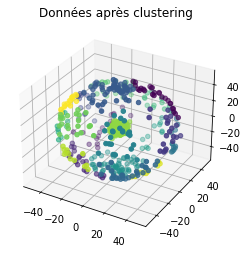

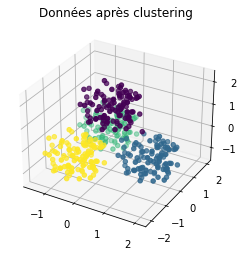

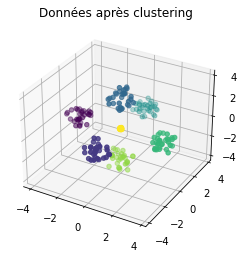

In [296]:
for idx, ds in enumerate(datasets):
  print(idx, agglomerative_application(2, 20, ds))

In [ ]:
print(agglomerative_application(2, 20, tr_ds))

# Application DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [301]:
def dbscan_application(dataset, min_eps, max_eps, eps_step):
  results = pd.DataFrame()
  for eps in np.arange(min_eps, max_eps, eps_step):
    start = default_timer()
    cl_predict = DBSCAN(eps = eps).fit_predict(dataset)
    stop = default_timer()
    results.loc[eps, 'Eps value'] = eps
    results.loc[eps, 'Time'] = stop - start
    if not (all(x == cl_predict[0] for x in cl_predict)):
      results.loc[eps,'Silhouette coefficient'] = metrics.silhouette_score(dataset, cl_predict, metric='euclidean')
    else:
      results.loc[eps, 'Silhouette coefficient'] = -10
  best_silh = max(results['Silhouette coefficient'])
  silhs = results['Silhouette coefficient'].to_numpy()
  best_eps_idx = (np.where(silhs == best_silh)[0])[0]
  best_eps = results['Eps value'].to_numpy()[best_eps_idx]
  cl_pred = DBSCAN(eps = best_eps).fit_predict(dataset)  
  show_result(dataset, cl_pred)
  return best_silh, metrics.davies_bouldin_score(dataset, cl_pred)

0 (0.22154775528921097, 9.016204448426107)
1 (0.44001381858138716, 1.5194007946779886)
2 (0.7006485323074687, 0.3550474416811)


KeyboardInterrupt: 

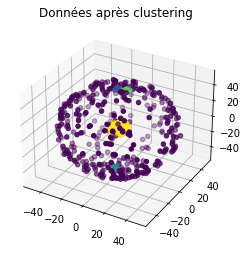

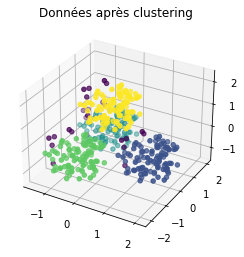

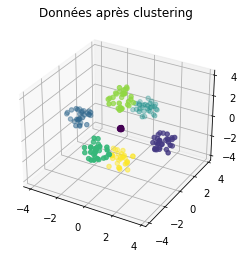

In [302]:
for idx, ds in enumerate(datasets):
    print(idx, dbscan_application(ds, 0.01, 3, 0.01))

In [ ]:
dbscan_application(tr_ds, 0.01, 3, 0.01)

# Application HDBSCAN 

In [ ]:
!pip uninstall hdbscan


In [ ]:
!pip install hdbscan 
import hdbscan

In [305]:
def hdbscan_iteration(dataset, min_min_cluster_size, max_min_cluster_size, step_min_cluster_size):
  results = pd.DataFrame()
  for min_cluster_size in range(min_min_cluster_size, max_min_cluster_size, step_min_cluster_size):
    start = default_timer()
    cl_predict = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size).fit_predict(dataset)
    stop = default_timer()
    results.loc[min_cluster_size, 'Min cluster size value'] = min_cluster_size
    results.loc[min_cluster_size, 'Time'] = stop - start
    results.loc[min_cluster_size,'Silhouette coefficient'] = metrics.silhouette_score(dataset, cl_predict, metric='euclidean')
  best_silh = max(results['Silhouette coefficient'])
  silhs = results['Silhouette coefficient'].to_numpy()
  best_min_cluster_size_idx = (np.where(silhs == best_silh)[0])[0]
  best_min_cluster_size = int(results['Min cluster size value'].to_numpy()[best_min_cluster_size_idx])
  cl_pred = hdbscan.HDBSCAN(min_cluster_size = best_min_cluster_size).fit_predict(dataset)  
  show_result(dataset, cl_pred)
  return best_silh, metrics.davies_bouldin_score(dataset, cl_pred)

0 (0.312174997631462, 20.888555160706428)
1 (0.43980195119040366, 1.6139438943240567)
2 (0.7006485323074687, 0.3550474416811)


KeyboardInterrupt: 

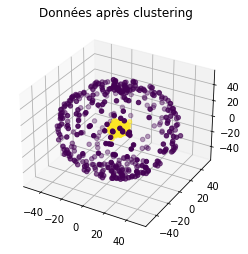

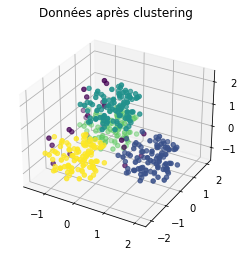

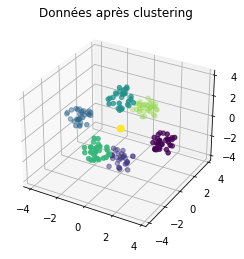

In [306]:
for idx, dataset in enumerate(datasets):
    print(idx, hdbscan_iteration(dataset, 2, 20, 1))

In [ ]:
print(hdbscan_iteration(tr_ds, 2, 20, 1))